# Machine learning
## Chapter 4, Differentiation
## Jun Sup Shin, Digital Imaging, GSAIM, CAU

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Analytic differentiation
Compute derivative using differentiation rules

ex) polynomial differentiation
$$\frac{d}{dw}w^n = nw^{n-1}$$

a function
$$f(x) = 2x^3+3x+1$$

derivative is
$$\frac{df(x)}{dx} = 6x^2+3$$

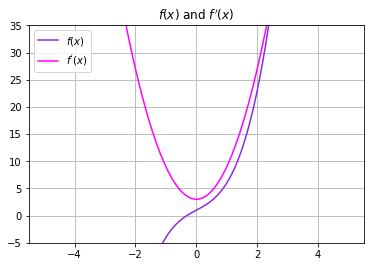

In [2]:
def f(x):
    return 2 * np.power(x, 3) + 3 * x + 1

def dev_f(x):
    return 6 * np.power(x, 2) + 3

x = np.linspace(-5, 5, 100)

plt.plot(x, f(x), color='blueviolet', label='$f(x)$')
plt.plot(x, dev_f(x), color='magenta', label='$f^{\'}(x)$')
plt.legend(loc='upper left')
plt.ylim(-5, 35)
plt.title('$f(x)$ and $f\'(x)$')
plt.grid(True)
plt.show()

## Numerical differentiation
Compute difference using 
$$\frac{df(x)}{dx}= \lim_{h \rightarrow 0}{\frac{f(x+h)-f(x)}{h}} $$

in computers, we cannot use $\lim_{h \rightarrow 0}$, but can use very small number $e=0.000001$

this is very useful when target function is very complicated or hard to model with math

In [3]:
def num_diff(f, x, e=0.000001):
    return (f(x+e)-f(x))/e

print("analytic f'(2)  = ", dev_f(2))
print("numerical f'(2) = ", num_diff(f, 2))

analytic f'(2)  =  27
numerical f'(2) =  27.000012003952634


## Chain rule

Differentiating composite function
$$f(g(x))$$
$$g(x) = x^2 + 3x + 1$$

then we can calculate $\frac{df}{x}$ by
$$\frac{df}{dx} = \frac{df}{dg} \frac{dg}{dx}$$

testing at point $x=2$

In [4]:
def g(x):
    return np.power(x, 2) + 3 * x + 1

def dev_g(x):
    return 2 * x + 3

print("chain rule : ", dev_f(g(2)) * dev_g(2))

fg = lambda x : f(g(x))
print("num_diff", num_diff(fg, 2))

chain rule :  5103
num_diff 5103.003964450181


## Partial differentiation
differentiate with only selected variable
$$f(x, y) = x^2 + 2xy+3$$
$$\frac{\partial f}{\partial x} = 2x + 2y$$

## Geometric interpretation of partial differentiation
partial differentiation tells you about the selected variable's tagent

partial differentiation of $f$
$$ \frac{\partial f}{\partial x} = 2x + 2y$$
$$ \frac{\partial f}{\partial y} = 2x $$

at some point $(1, 2)$
$$ \left. \frac{\partial f}{\partial x}\right|_{(1, 2)} = 6 $$
$$ \left. \frac{\partial f}{\partial y}\right|_{(1, 2)} = 2 $$

then gradient can be computed from partial differentiation
$$\nabla f = \left[\frac{\partial f}{\partial x} \hspace{2mm} \frac{\partial f}{\partial y}\right]^T$$

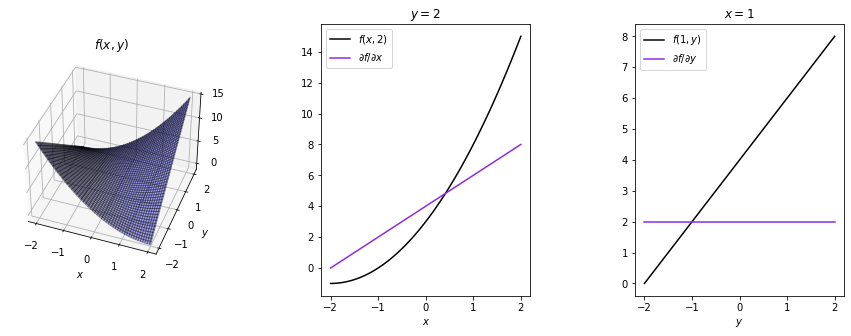

In [5]:
def f(x, y):
    return np.power(x, 2) + 2 * x * y + 3

def par_fx(x, y):
    return 2 * x + 2 * y

def par_fy(x, y):
    return 2 * x

x, y = np.linspace(-2, 2, 100), np.linspace(-2, 2, 100)

_x, _y = np.meshgrid(x, y)

plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax = plt.subplot(1, 3, 1, projection='3d')
plt.title("$f(x, y)$")
ax.plot_surface(_x, _y, f(_x, _y), alpha=0.3, color='blue', edgecolor='black')
plt.xlabel("$x$")
plt.ylabel("$y$")
ax.view_init(40, 290)

plt.subplot(1, 3, 2)
plt.plot(x, f(x, 2), color='black', label='$f(x, 2)$')
plt.plot(x, par_fx(x, 2), color='blueviolet', label='$ \partial f / \partial x} $')
plt.title("$y=2$")
plt.xlabel("$x$")
plt.legend(loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(x, f(1, y), color='black', label="$f(1, y)$")
plt.plot(y, np.full(y.shape, par_fy(1, y)) , color='blueviolet', label='$ \partial f / \partial y} $')
plt.title("$x=1$")
plt.xlabel("$y$")
plt.legend(loc='upper left')

plt.show()

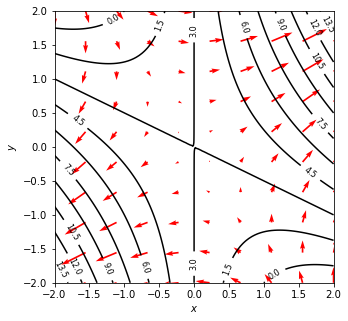

In [6]:
plt.figure(figsize=(5, 5))
cont = plt.contour(_x, _y, f(_x, _y), 10, colors='k')
cont.clabel(fmt="%2.1f", fontsize=8)
plt.xlabel("$x$")
plt.ylabel("$y$")

grad_x_lin = np.linspace(-2, 2, 10)
gard_y_lin = np.linspace(-2, 2, 10)

_x_lin, _y_lin = np.meshgrid(grad_x_lin, gard_y_lin)

plt.quiver(_x_lin, _y_lin, par_fx(_x_lin, _y_lin), par_fy(_x_lin, _y_lin), color='red')

plt.show()

## Chain rule of partial differentiation

$$\frac{\partial}{\partial x} f \left(g(x, y), h(x, y)\right) = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x} + \frac{\partial f}{\partial h} \frac{\partial h}{\partial x}$$

simply add two partial difference